<a href="https://colab.research.google.com/github/sakamoto-hands-on/Python_DeepLearning_BasicTheory/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[ゼロから作るDeepLearning](http://www.rissoku.net/2018/22_diary_20181230/)を参考にしながら、MNISTをやってみる



###ローカルに保存したmnist.pyをColaboratoryにアップ

In [1]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving mnist.py to mnist.py


In [0]:
from mnist import load_mnist

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [0]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


###ソフトマックス関数とシグモイド関数を定義

In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a -c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

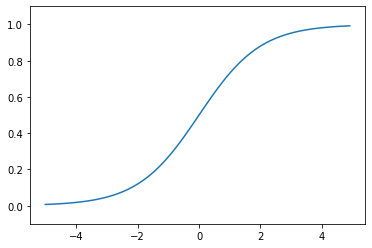

In [25]:
#シグモイド関数をプロット
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ディープラーニングのように層を重ねて学習するときには、シグモイド関数やステップ関数などの非線形関数を使うことで、多層にすることの利点を生かすことができるそうです。

機械学習は大きく分けると「回帰問題」と「分類問題」があり、回帰問題には恒等関数を、分類問題にはソフトマックス関数を使うそうです。今回のMNISTは10種類の数字に分類することが目的なのでソフトマックス関数を使います。

In [0]:
import pickle

###データの取得、ネットワークの初期化、予測の3つを定義

In [0]:
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

今回は練習のため、学習済みの重みを使用

In [19]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving sample_weight.pkl to sample_weight.pkl


In [20]:
%ls

mnist.pkl     sample_data/               t10k-labels-idx1-ubyte.gz
mnist.py      sample_weight.pkl          train-images-idx3-ubyte.gz
__pycache__/  t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte.gz


In [24]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Accuracy:0.9207


###まとめ
今回は、順方向の伝播(Forward propagation)に学習済みの重みをかけることで、約92%の正解率を出すことができました。どのように重みを、より正確なものへと学習していくのかなど、次の章が楽しみです！！